In [12]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [13]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label=train_test_split(perch_length, perch_weight, random_state=42)
print(train_data)
print(test_data)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [14]:
train_data=train_data.reshape(-1,1)
test_data=test_data.reshape(-1,1)
print(train_data)
print(test_data)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(train_data, train_label)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print(knr.predict([[50]]))

[1033.33333333]


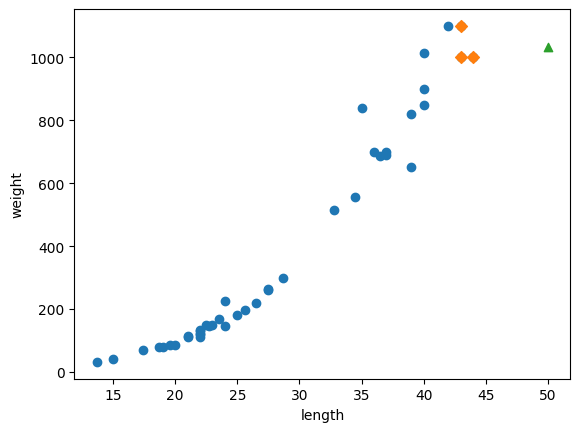

In [17]:
import matplotlib.pyplot as plt
distances, indices= knr.kneighbors([[50]])
plt.scatter(train_data, train_label)
plt.scatter(train_data[indices], train_label[indices], marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(np.mean(train_label[indices]))

1033.3333333333333


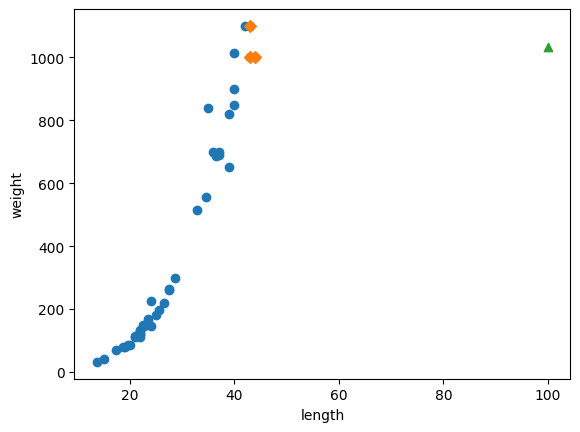

In [19]:
distances, indices= knr.kneighbors([[100]])
plt.scatter(train_data, train_label)
plt.scatter(train_data[indices], train_label[indices], marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_data, train_label)
print(lr.predict([[50]]))

[1241.83860323]


In [21]:
# lr.coef: 기울기, lr.intercept_:Y절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


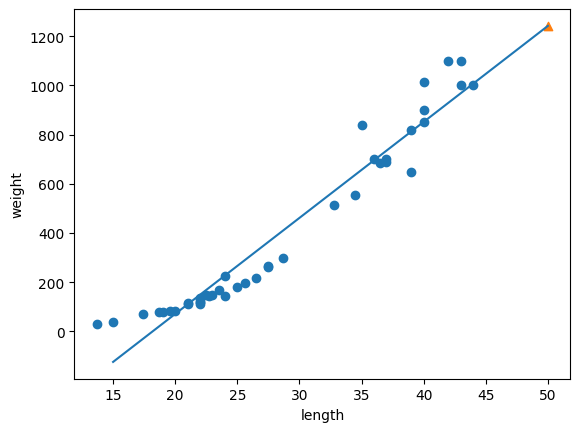

In [22]:
plt.scatter(train_data, train_label)

#15~50까지 1차방정식 그래프
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm농어
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(lr.score(train_data, train_label))
print(lr.score(test_data, test_label))

0.939846333997604
0.8247503123313558


다항 회귀

최적의 곡선 찾기

In [24]:
train_poly=np.column_stack((train_data**2, train_data))
test_poly=np.column_stack((test_data**2, test_data))

In [25]:
print(train_poly.shape, test_poly.shape)
print(lr.coef_)

(42, 2) (14, 2)
[39.01714496]


IndexError: index 1 is out of bounds for axis 0 with size 1

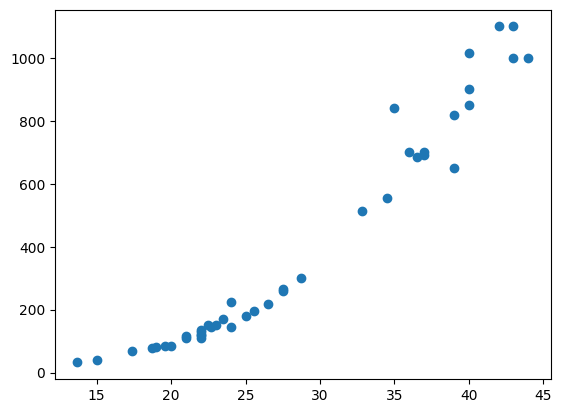

In [26]:
point=np.arange(15,50)
plt.scatter(train_data, train_label)
plt.plot(point, lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_)

plt.scatter(50,1574,marker='^')
plt.show()

In [27]:
import pandas as pd
df=pd.read_csv('http://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [28]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label=train_test_split(perch_full, perch_weight, random_state=42)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [30]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_data)
train_poly=poly.transform(train_data)
print(train_poly.shape)

(42, 9)


In [31]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [32]:
test_poly=poly.transform(test_data)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly, train_label)

LinearRegression()

In [34]:
print(lr.score(train_poly, train_label))
print(lr.score(test_poly, test_label))

0.9903183436982124
0.9714559911594203


In [35]:
poly=PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_data)
train_poly=poly.transform(train_data)
test_poly=poly.transform(test_data)
print(train_poly.shape)

(42, 55)


In [36]:
lr.fit(train_poly, train_label)
print(lr.score(train_poly, train_label))
print(lr.score(test_poly, test_label))

0.999999999997515
-144.40196592191958


In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

릿지(Ridge)
계수를 제곱한 값을 기준으로 규제를 적용함

In [38]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, train_label)
print(ridge.score(train_scaled, train_label))
print(ridge.score(test_scaled, test_label))

0.9896101671037343
0.9790693977615376


In [39]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha) #릿지 모델 만듬
    ridge.fit(train_scaled, train_label)#릿지 모델 훈련
    train_score.append(ridge.score(train_scaled, train_label))
    test_score.append(ridge.score(test_scaled, test_label))


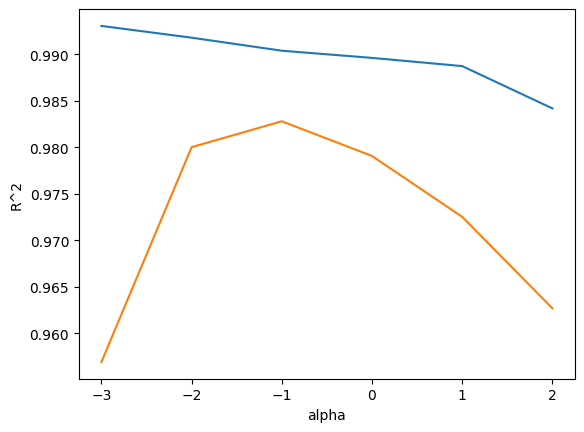

In [40]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

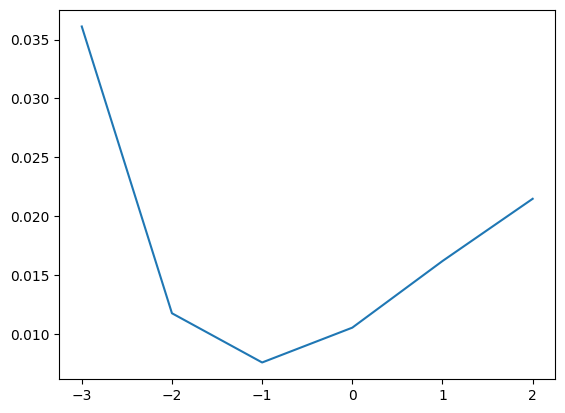

In [41]:
pp=[a-b for a,b in zip(train_score,test_score)]
plt.plot(np.log10(alpha_list), pp)

라쏘 회귀
: 계수의 절댓값을 기준으로 규제 적용

In [42]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled, train_label)
print(lasso.score(train_scaled, train_label))
print(lasso.score(test_scaled, test_label))

0.989789897208096
0.9800593698421886


In [43]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_label)
    train_score.append(lasso.score(train_scaled, train_label))
    test_score.append(lasso.score(test_scaled, test_label))

c:\Users\user\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\envs\env1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


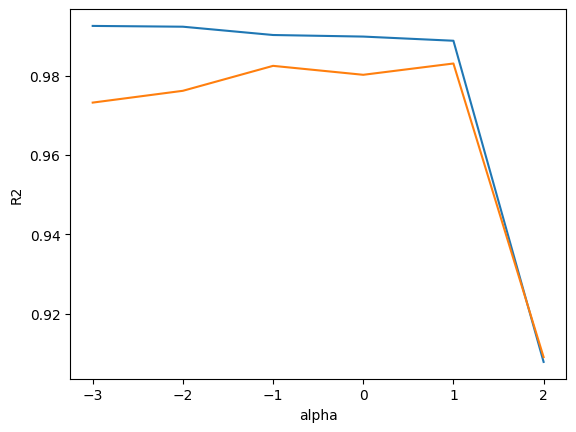

In [44]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.show()

In [45]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled, train_label)
print(lasso.score(train_scaled, train_label))
print(lasso.score(test_scaled, test_label))

0.9888067471131867
0.9824470598706695


In [46]:
print(np.sum(lasso.coef_==0))

40


로지스틱 회귀: 회귀라고 썼는데 사실 분류임

In [47]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [48]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [49]:
fish_data=fish[['Weight', 'Length', 'Diagonal', 'Height','Width']]
print(fish_data)

     Weight  Length  Diagonal   Height   Width
0     242.0    25.4      30.0  11.5200  4.0200
1     290.0    26.3      31.2  12.4800  4.3056
2     340.0    26.5      31.1  12.3778  4.6961
3     363.0    29.0      33.5  12.7300  4.4555
4     430.0    29.0      34.0  12.4440  5.1340
..      ...     ...       ...      ...     ...
154    12.2    12.2      13.4   2.0904  1.3936
155    13.4    12.4      13.5   2.4300  1.2690
156    12.2    13.0      13.8   2.2770  1.2558
157    19.7    14.3      15.2   2.8728  2.0672
158    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 5 columns]


In [50]:
fish_data=fish[['Weight', 'Length', 'Diagonal', 'Height','Width']].to_numpy()
print(fish_data[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [51]:
fish_label=fish['Species'].to_numpy

In [52]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label=train_test_split(fish_data, fish_label, random_state=42)

TypeError: Singleton array array(<bound method IndexOpsMixin.to_numpy of 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object>, dtype=object) cannot be considered a valid collection.